In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(flowCore)
library(FlowSOM)

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:flowCore’:

    normalize, parent, tree


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
path <- "../data/AMJ_5L_Costim.fcs"
f <- read.FCS(path, transformation=TRUE)
summary(f) 

FSC-A     FSC-H     FSC-W     SSC-A     SSC-H     SSC-W     Blue B-A  
Min.      8115.32  10016.00  52941.04    -58.50     39.00      0.00   -224.640
1st Qu.  85423.84  68520.75  75363.05  32323.59  28755.00  72096.97    159.120
Median  106674.00  88258.50  78374.04  45341.01  39318.00  73540.32    417.690
Mean    116164.27  93255.43  81488.47  73201.61  58258.84  79145.92   2811.148
3rd Qu. 134093.69 111986.25  82921.75  76215.55  60272.00  77890.96    730.080
Max.    262143.00 262062.00 262143.00 262143.00 256047.00 262143.00 262143.000
        Blue A-A    Violet H-A  Violet G-A Red C-A     Red B-A     Red A-A   
Min.      -190.7100   -131.1000   -137.750   -251.4500   -124.1200   -281.410
1st Qu.    177.8400     57.9500    811.300     93.0900    120.9100    140.170
Median     902.0699    100.7000   1709.050    467.5900    449.4000    380.920
Mean      1660.0286    267.6635   2128.399    722.0453    642.4512   1457.254
3rd Qu.   2504.9700    269.8000   2610.600   1052.8800    841.0200   1295.770
Max.    262143.0000 243319.7031 262143.000 262143.0000 262143.0000 262143.000
        Green E-A   Green D-A  Green C-A  Green A-A   Time    
Min.      -223.4800    -91.020   -237.540    -88.0600     0.50
1st Qu.     70.3000    140.600    555.000    216.0800  8495.50
Median     189.4400    722.980   1206.200    399.6000 16776.65
Mean       316.5595   2559.036   2544.147    601.0417 17038.89
3rd Qu.    408.4800   3965.660   2456.060    663.7800 25170.40
Max.    262143.0000 262143.000 262143.000 262143.0000 35854.20

In [4]:
colnames(f)[7:17]

[1] "Blue B-A"   "Blue A-A"   "Violet H-A" "Violet G-A" "Red C-A"   
 [6] "Red B-A"    "Red A-A"    "Green E-A"  "Green D-A"  "Green C-A" 
[11] "Green A-A"

## Using FlowSOM

See [link](https://rdrr.io/bioc/FlowSOM/man/SOM.html) for meaning of parameters.

In [5]:
set.seed(42)

fSOM <- FlowSOM(path,
                # Input options:
                compensate = TRUE,
                transform = TRUE,
                toTransform=c(7:17),
                scale = TRUE,
                # SOM options:
                colsToUse = c(7:17), 
                xdim = 10, 
                ydim = 10,
                # Metaclustering options:
                nClus = 10)

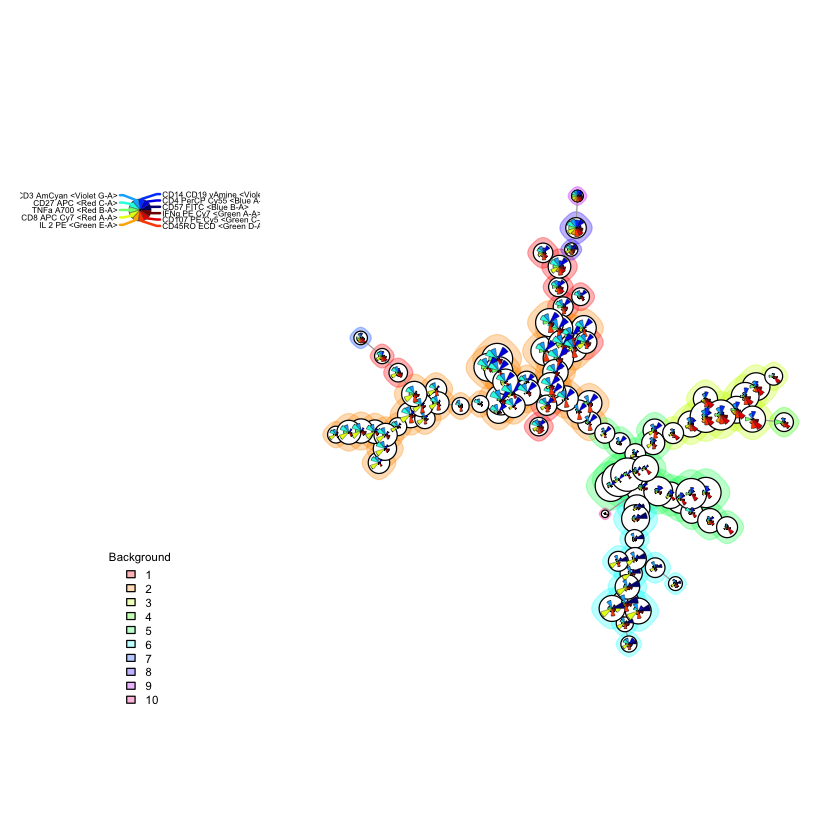

In [6]:
PlotStars(
    fSOM[[1]],
    backgroundValues = as.factor(fSOM[[2]]))